# Prior Distributions for Landslide Parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
from scipy import special

### Parameters

In [2]:
# plot sizes and color density
densityX = 100
densityY = 5 * densityX
contourDensity = 50
size_X = 10
size_Y = 4*size_X

# variance for volume and thickness parameters
vol_sigma = 4
thick_sigma = 10

# modifiers for depth distribution shape
depth_scale = 500
chi_k = 4
depth_size = 250

# choose 22-point data set (2) or 7-point data set (3)
dataSelect = 2

### Import Data

In [3]:
df2D_array = np.asarray(pd.read_csv("Landslide_Gauss_Parameters_Volume.csv"))
df3D_array = np.asarray(pd.read_csv("Landslide_GParams_ThVmSl.csv"))
dfT_array = np.asarray(pd.read_csv("Landslide_Gauss_Parameters_Thickness.csv"))

### Initizalize Arrays

In [4]:
# get volume data
volume_2D = np.array([[x for x in df2D_array[0:60, 3] if not math.isnan(float(x))]])
volume_3D = np.array([[x for x in df3D_array[0:30, 3] if not math.isnan(float(x))]])
# get slope data
meanSlope_2D = np.array([[x for x in df2D_array[0:60, 4] if not math.isnan(float(x))]])
meanSlope_3D = np.array([[x for x in df3D_array[0:30, 4] if not math.isnan(float(x))]])
# get thickness data
thickness = np.array([[x for x in dfT_array[0:20, 2] if not math.isnan(float(x))]])

### Calculate Gaussian Distribution

In [5]:
def gausser(x, y, sigma):
    """
    Compute gaussian distribution around each point in the data
        :param x: x-values from meshgrid
        :param y: y-values from meshgrid
        :return: meshgrid of weights
    """
    # set slopes and volumes based on the data set we are interested in
    total = np.zeros(x.shape)
    if dataSelect == 2:
        slopes = meanSlope_2D
        volumes = volume_2D
    else:
        slopes = meanSlope_3D
        volumes = volume_3D
    # for every point in the data, get the gaussian distribution around it
    for i in range(slopes.size):
        total += np.exp(-((slopes[:,i] - x)**2 + (volumes[:,i] - y)**2) / 2 / sigma**2)
        
    # return the sum of all the gaussian distributions
    return total

## Volume

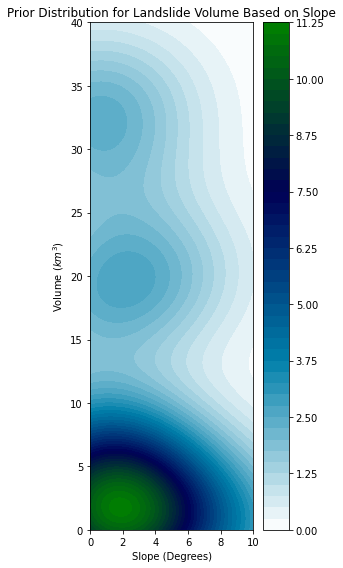

In [6]:
x = np.linspace(0, size_X, densityX)
y = np.linspace(0, size_Y, densityY)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(4, 8))

# compute contour plot
Z = gausser(X, Y, vol_sigma)
plt.contourf(X, Y, Z, contourDensity, cmap='ocean_r')

# set plot attributes
plt.colorbar()
plt.title("Prior Distribution for Landslide Volume Based on Slope")
plt.xlabel("Slope (Degrees)")
plt.ylabel("Volume ($km^3$)")
plt.tight_layout()
plt.show()

## Thickness

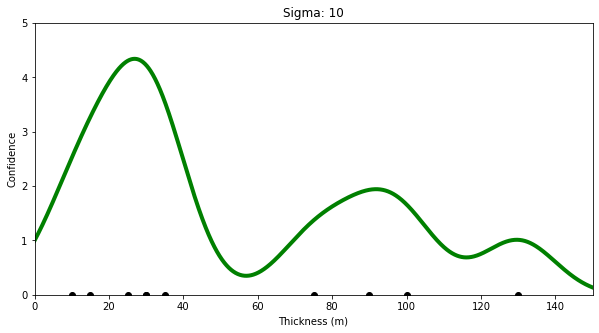

In [7]:
# compute contour plot
x = np.linspace(0, size_X*40, densityX*40)
y = np.zeros(x.shape)
for j in range(thickness.size):
    y += np.exp(-((thickness[:, j] - x) ** 2) / 2 / thick_sigma ** 2)

# plot the distribution and the thickness data
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, c='g', lw=4)
plt.scatter(thickness, np.zeros((len(thickness[0]), 1)), color='k')

plt.title("Prior Distribution for Landslide Thickness")
plt.title("Sigma: " + str(round(thick_sigma, 3)))
plt.ylabel("Confidence")
plt.xlabel("Thickness (m)")
plt.xlim(0, 150)
plt.ylim(0, 5)
plt.show()

## Depth

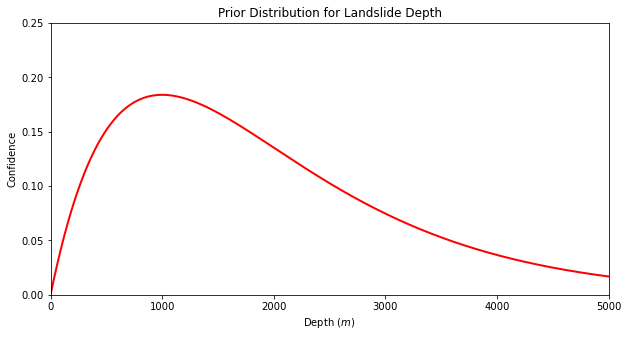

In [8]:
# compute distribution plot
x = np.linspace(0, 20*depth_size, depth_size * 2)
y = 1 * (x/depth_scale)**(chi_k/2-1) * np.exp(-(x/depth_scale)/2) / 2**(chi_k/2) / special.gamma(chi_k/2)

# plot distribution and set plot parameters
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, c='r', lw=2)
plt.title("Prior Distribution for Landslide Depth")
plt.xlabel("Depth $(m)$")
plt.ylabel("Confidence")
plt.xlim(0, 20*depth_size)
plt.ylim(0, 0.25)
plt.show()